In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
print(torch.cuda.is_available())

1.6.0
True


# 1. Dataset

(20,)
(20,)


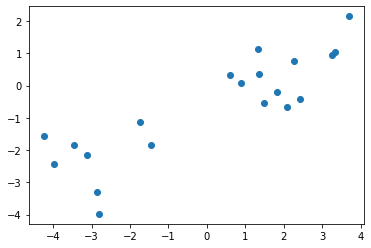

In [2]:
N = 20

# X = 20x random in [-5, +5]
X = np.random.random(N)*10 - 5
print(X.shape)

# y = A line plus some noise
y = 0.5 * X - 1 + np.random.randn(N)
plt.scatter(X, y);
print(y.shape)

In [3]:
X = X.reshape(N, 1)
y = y.reshape(N, 1)

# Convert to pytorch tensors
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32))

print(X_train.shape)
print(y_train.shape)

torch.Size([20, 1])
torch.Size([20, 1])


# 2. Model

In [4]:
import torch.nn as nn

# model
lr_model = nn.Linear(1, 1)

# loss function: MSE
mse_loss = nn.MSELoss()

# Optimizer: SGD
sgd_opt = torch.optim.SGD(lr_model.parameters(), lr=0.05)

# 3. Train

In [5]:
def fit(X, y, model, loss_fn, optimizer, n_epochs):
    losses = []
    for i in range(n_epochs):
        # zero the parameter gradients
        optimizer.zero_grad()

        # Forward
        y_ = model(X)
        loss = loss_fn(y_, y)

        # Save loss
        losses.append(loss.item())

        # Backward
        loss.backward()
        optimizer.step()
            
        if (i+1)%10==0: print(f"Epoch {i+1}/{n_epochs}, Loss: {loss.item():.4f}")

    # Plot losses
    plt.plot(losses);

Epoch 10/100, Loss: 0.6452
Epoch 20/100, Loss: 0.6443
Epoch 30/100, Loss: 0.6442
Epoch 40/100, Loss: 0.6442
Epoch 50/100, Loss: 0.6442
Epoch 60/100, Loss: 0.6442
Epoch 70/100, Loss: 0.6442
Epoch 80/100, Loss: 0.6442
Epoch 90/100, Loss: 0.6442
Epoch 100/100, Loss: 0.6442


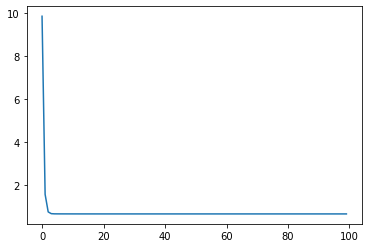

In [6]:
fit(
    X=X_train, y=y_train,
    model=lr_model, loss_fn=mse_loss, optimizer=sgd_opt,
    n_epochs=100)

# 4. Test

In [7]:
# test = train to verify model
X_test = X_train
y_test = y_train

y_test_ = lr_model(X_test)
loss = mse_loss(y_test_, y_test)
print(f"Final loss: {loss:.4f}")

Final loss: 0.6442


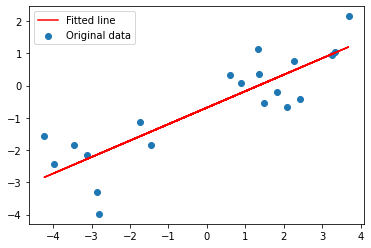

In [8]:
# Plot final prediction

## convert pytorch tensor -> numpy
X_test = X_test.detach().numpy()
y_test_ = y_test_.detach().numpy()

plt.scatter(X, y, label='Original data')
plt.plot(X_test, y_test_, color='red', label='Fitted line')
plt.legend()
plt.show()